In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import summarize_average_models_dot_boundary

In [3]:
# python collect_jobs_and_clean.py /scratch2/smaruj/virtual_insertion_dots_DW_m0 -d /home1/smaruj/akitaX1-analyses/experiments/virtual_insertion_dots_vs_boundaries/input_data/dot_CTCFs_jaspar_filtered_mm10_strong_dots.tsv -v -l

In [4]:
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/dot_windows"

In [5]:
df = summarize_average_models_dot_boundary(data_dir, models_number=8, columns_to_keep=["chrom", "end", "start", "strand"] + ["DETECTION_SCALE", "FDR"])

## Correlation between boundary SCD and FDR

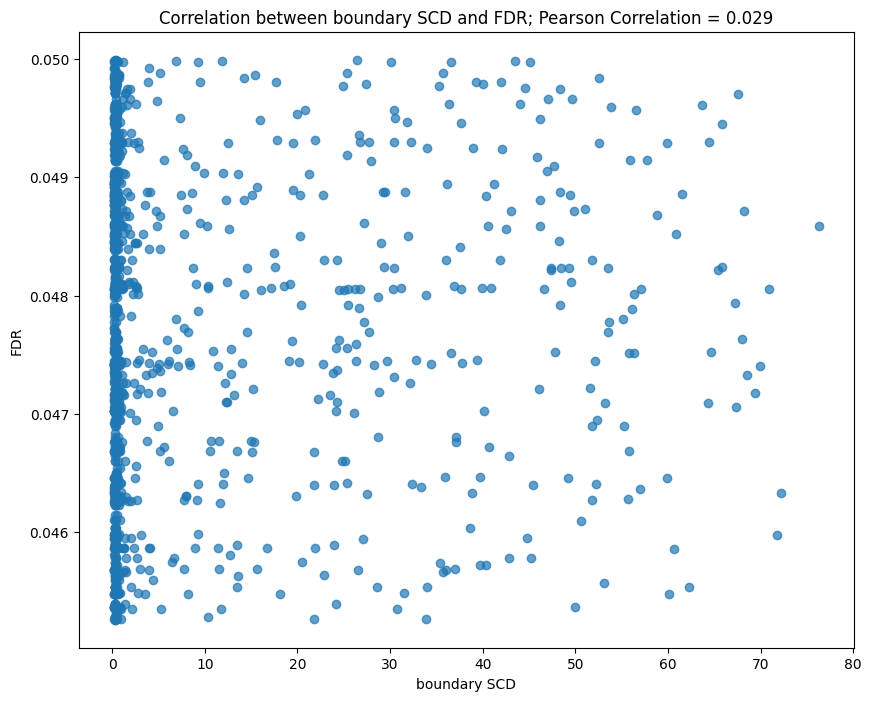

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_B"], df["FDR"], alpha=0.7)

pearson_corr = stats.pearsonr(df["SCD_B"], df["FDR"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("FDR")

ax.set_title(f"Correlation between boundary SCD and FDR; Pearson Correlation = {rounded_pearson_corr}")

# plt.savefig("./plots/boundarySCD_vs_dotSCD.png", bbox_inches="tight")

plt.show()

## Correlation between boundary and dot SCD

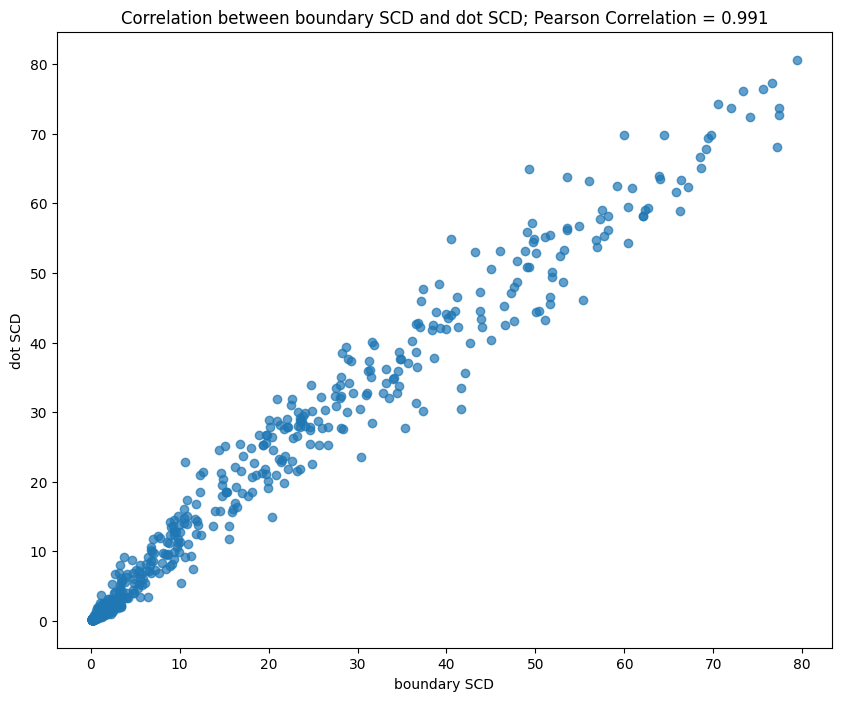

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_m0_B"], df["SCD_m0_D"], alpha=0.7)

pearson_corr = stats.pearsonr(df["SCD_m0_B"], df["SCD_m0_D"]).statistic
rounded_pearson_corr = round(pearson_corr, 3)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot SCD")

ax.set_title(f"Correlation between boundary SCD and dot SCD; Pearson Correlation = {rounded_pearson_corr}")

# plt.savefig("./plots/boundarySCD_vs_dotSCD.png", bbox_inches="tight")

plt.show()

## Boundary SCD vs. cross-score

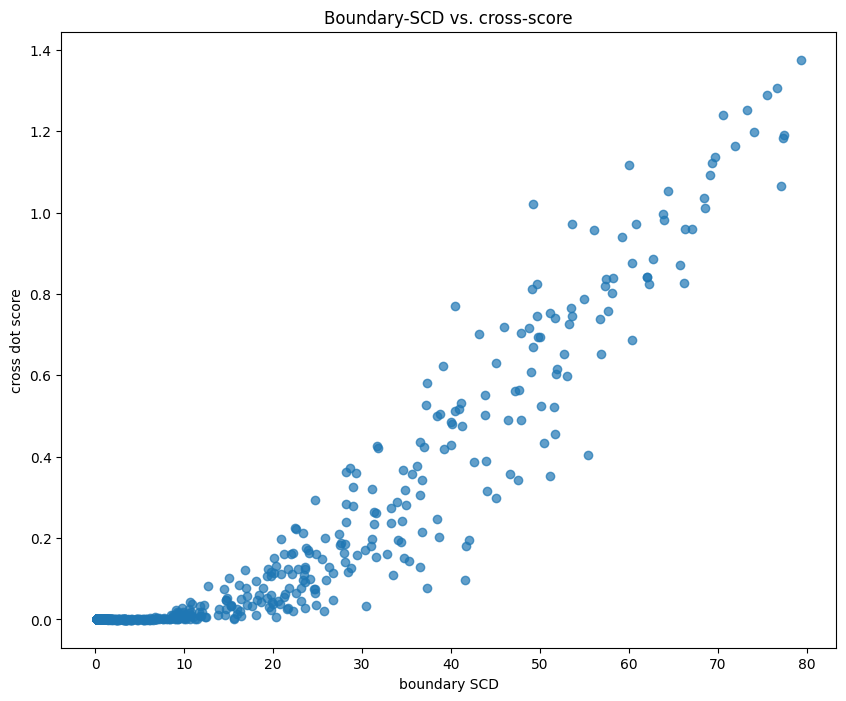

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_m0_B"], df["cross-score_m0"], alpha=0.7)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

ax.set_title("Boundary-SCD vs. cross-score")

# plt.savefig("./plots/boundarySCD_vs_cross-score.png", bbox_inches="tight")

plt.show()


## Boundary-SCD vs. dot-score

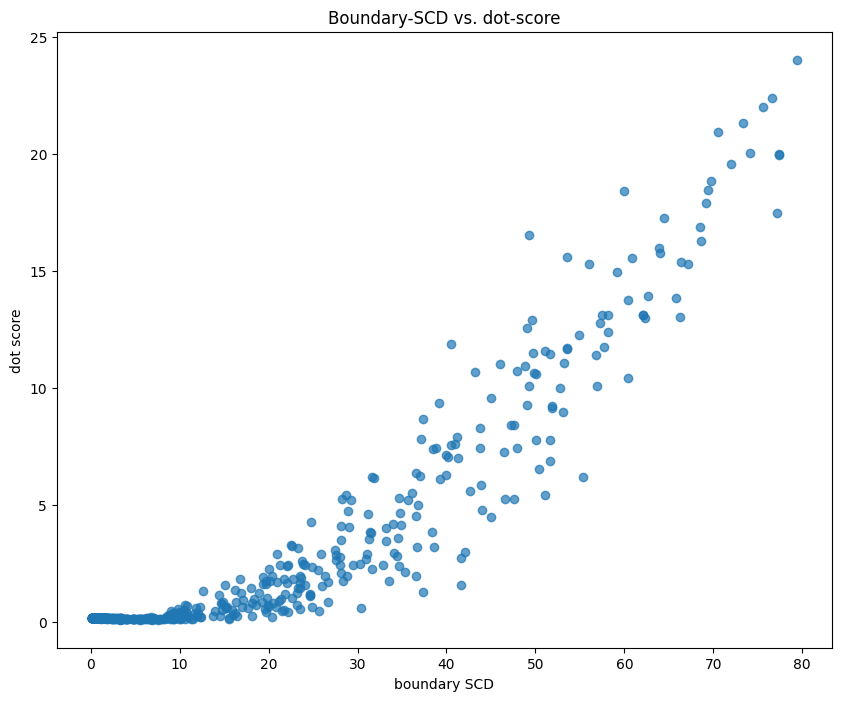

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_m0_B"], df["dot-score_m0"], alpha=0.7)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("dot score")

ax.set_title("Boundary-SCD vs. dot-score")

# plt.savefig("./plots/boundarySCD_vs_dot-score.png", bbox_inches="tight")

plt.show()

## Boundary-SCD vs. x-score

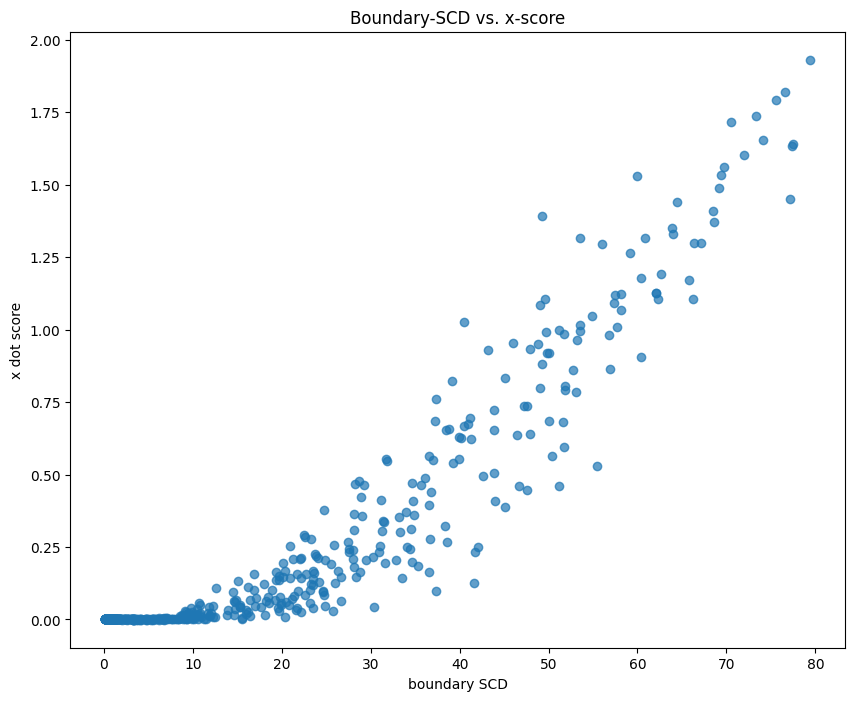

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(df["SCD_m0_B"], df["x-score_m0"], alpha=0.7)

ax.set_xlabel("boundary SCD")
ax.set_ylabel("x dot score")

ax.set_title("Boundary-SCD vs. x-score")

# plt.savefig("./plots/boundarySCD_vs_x-score.png", bbox_inches="tight")

plt.show()

## Scatterplot with histograms on the margins

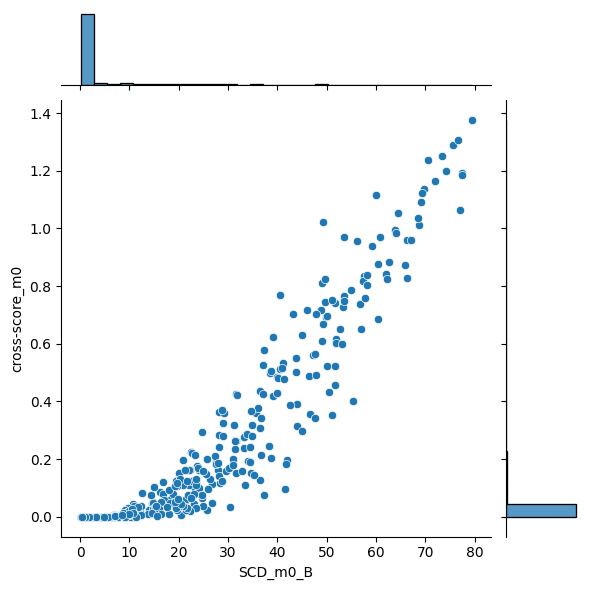

In [11]:
sns.jointplot(
    x=df["SCD_m0_B"], y=df["cross-score_m0"], marginal_kws=dict(bins=30, fill=True),
)

## Overlapping scatterplots between boundary and dot windows

In [12]:
B_data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_dots_vs_boundaries/boundary_windows"

In [13]:
B_df = summarize_average_models_dot_boundary(B_data_dir, models_number=8, ignore_keys=["insertion_SCD", "disruption_SCD"])

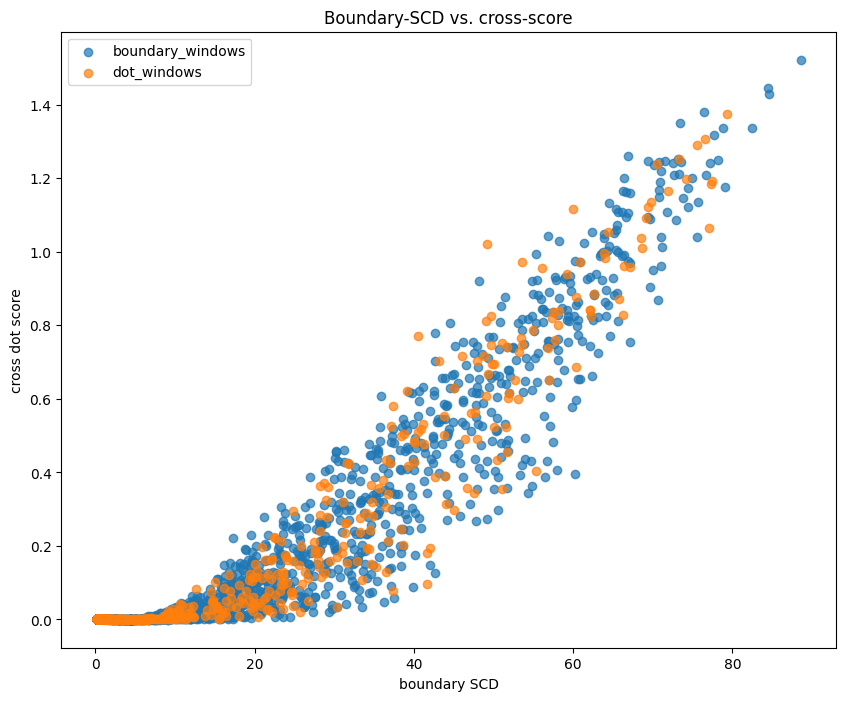

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(B_df["SCD_m0_B"], B_df["cross-score_m0"], alpha=0.7, label="boundary_windows")
scatter = ax.scatter(df["SCD_m0_B"], df["cross-score_m0"], alpha=0.7, label="dot_windows")

ax.legend()
ax.set_xlabel("boundary SCD")
ax.set_ylabel("cross dot score")

ax.set_title("Boundary-SCD vs. cross-score")

# plt.savefig("./plots/boundarySCD_vs_cross-score.png", bbox_inches="tight")

plt.show()
